### 목표
- 선형회귀 이론에 대해서 이해해 보자
- LinearModel을 사용해 보자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 생성
data = pd.DataFrame({'시간':[2,4,8,9],'성적':[20,40,80,90]}, index=['교인','홍철','상석','승철'])

### 선형모델을 활용
- 7시간 공부했을 때의 성적 예측

In [3]:
# 수학공식을 활용한 해석적 방법 -> mse를 가지고 찾아가는 방법
# 모델 불러오기
from sklearn.linear_model import LinearRegression

In [4]:
#모델 객체생성
linear_model = LinearRegression()

#단순선형회귀모델인 LinearRegression()은 하이퍼파라미터가 없음

In [5]:
#모델 학습
#model.fit(학습용문제, 학습용정답)
#model.fit(시간,성적)
#문제>2차원, 정답>1차원

data[['시간']] #2차원으로 만들어주기 -> 대괄호로 한 번 더 감싼다!
data['성적']

linear_model.fit(data[['시간']], data['성적'])

LinearRegression()

In [6]:
# 우리가 스스로 예측한 예상 직선 > y = 10x
# 모델이 예측한 직선을 확인 (y = wx + b)
print('가중치(w)', linear_model.coef_)
print('절편(b)', linear_model.intercept_)

#7.105427357601002e-15??
#부동소수점: 소수점을 앞으로 15번 이동 - 거의 0과 같음
#y = 10x + 0(거의)

가중치(w) [10.]
절편(b) 7.105427357601002e-15


In [7]:
#모델 예측
#model.predict(테스트용 문제)
#7시간 공부했을 때 성적은?
linear_model.predict([[7]]) #문제데이터는 반드시 이차원 형태여야

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.])

##### 경사하강법 그래프 그려보기
- 선형모델의 MSE(평균제곱오차)가 최소가 되는 w와 b값을 찾아나가는 방법
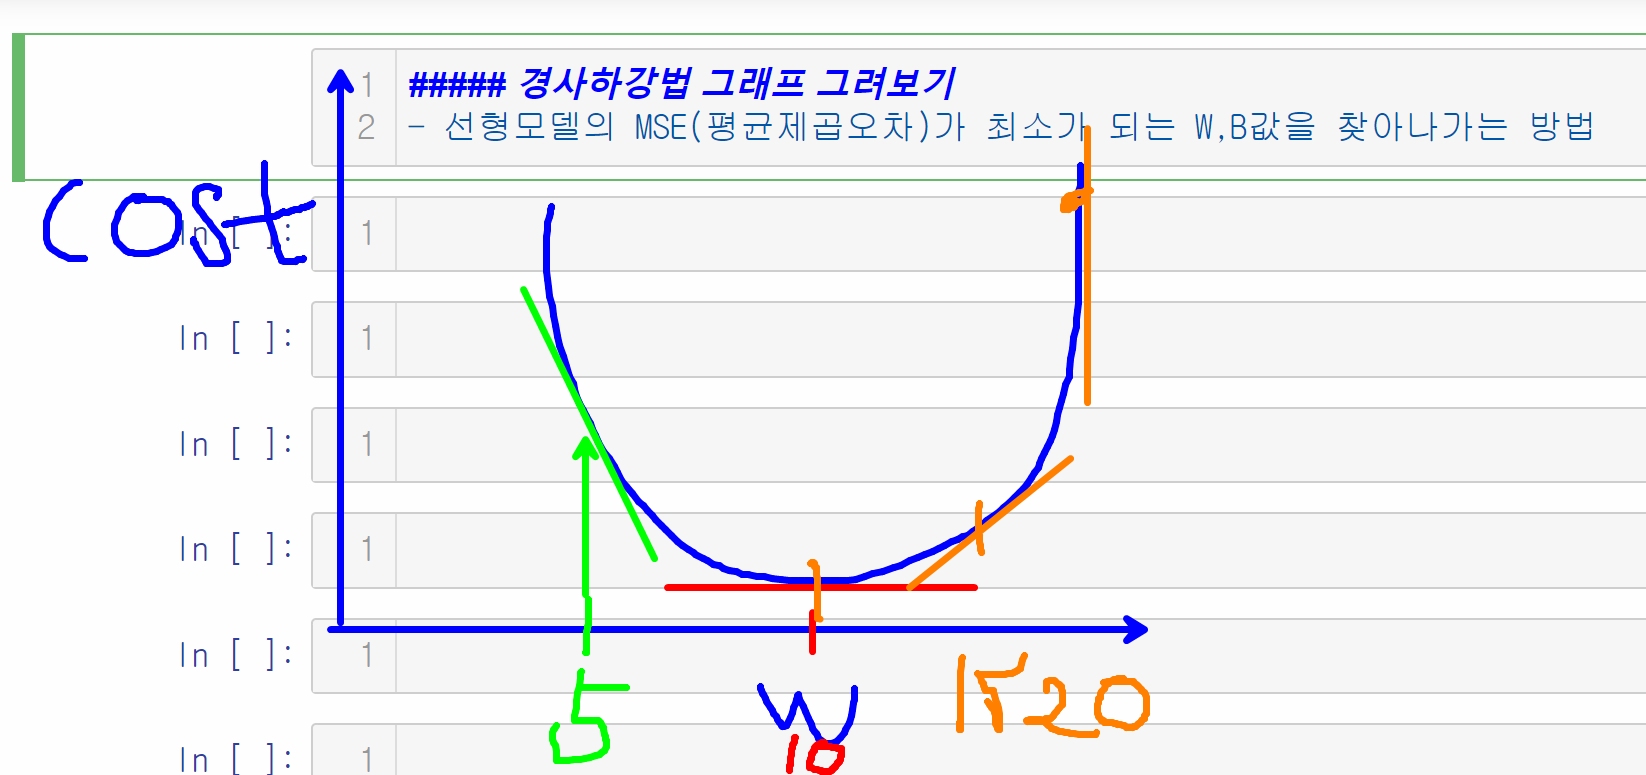
- 가중치(w) 변화에 따른 비용함수(cost) 값의 변화그래프 출력
    - 비용함수는 원래의 값과 가장 오차가 작은 함수를 도출하기 위해 사용되는 함수.
- 초기 w는 랜덤하게 정해진다.

In [8]:
# 가설 함수 설정
def h(w,x):
    return w*x + 0 
#우리가 w 값이 달라질 경우 계속해서 다른 수로 바꿔주어야 한다.

In [9]:
# 비용함수 설정(MSE)
def cost(data,target,weight):
    #data : 예측할 데이터의 x값, target:실제 답,weight : 가중치
    y_pre = h(weight,data) #함수 안에서 다른 함수를 불러와 사용하는 것
    mse = ((y_pre - target)**2).mean() #(예측값-실제값)^2의 평균
    return mse

#이건 mse 이해를 위해 직접 쳐 본 것. 원래 선형모델은 이런 계산 내부적으로 자체 실행.

In [10]:
#우리가 예측한 가중치가 10일때 MSE
cost(data['시간'], data['성적'], 10)
#오차가 0

0.0

In [11]:
#가중치가 5라면?
cost(data['시간'], data['성적'], 5)
#오차 줄이기 위해 가중치를 늘려주자

1031.25

In [12]:
#가중치 15일 때
cost(data['시간'], data['성적'], 15)

#10과의 거리가 같기 때문에 오차도 위와 동일

1031.25

In [13]:
#가중치 12

cost(data['시간'], data['성적'], 12)


165.0

- w(가중치) 값의 변화에 따른 MSE 변화율 그래프 그리기 : 경사하강법 그래프

In [14]:
w_arr = range(-10,31)

cost_list=[]
for w in w_arr:
    c = cost(data['시간'],data['성적'],w)
    cost_list.append(c)

In [15]:
cost_list

[16500.0,
 14891.25,
 13365.0,
 11921.25,
 10560.0,
 9281.25,
 8085.0,
 6971.25,
 5940.0,
 4991.25,
 4125.0,
 3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0,
 4991.25,
 5940.0,
 6971.25,
 8085.0,
 9281.25,
 10560.0,
 11921.25,
 13365.0,
 14891.25,
 16500.0]

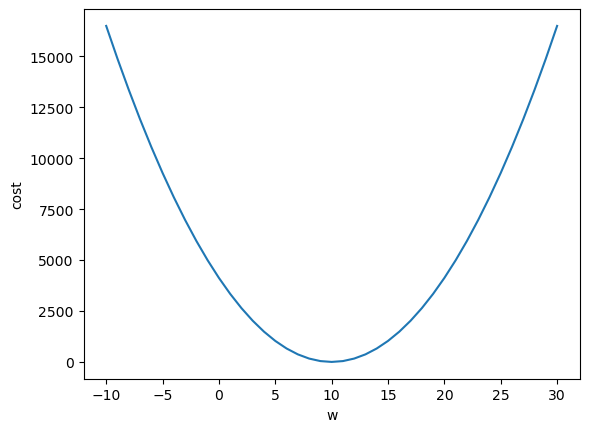

In [16]:
#그래프 그리기

plt.plot(w_arr, cost_list) #(x축, y축) 
plt.xlabel('w')
plt.ylabel('cost')
plt.show()

### SGD 모델

- 사이킷런에서 구성해 놓은 경사하강법을 활용한 선형회귀모델
- 이전에 사용한 LinearRegressor는 단순 수학적 계산만을 이용한 것과는 달리 여기서는 경사하강법 이용.
- SGD(확률적 경사하강법 : Stochastic Gradient Descent)

In [17]:
#도구 불러오기
from sklearn.linear_model import SGDRegressor

In [19]:
#확률적 경사하강법 모델 생성
sgd = SGDRegressor(eta0 = 0.0001, #러닝레이트, 학습률, 보폭
            max_iter =500, #w값 업데이트 횟수 > 500번 업데이트
            verbose = 1) #진행상황 출력해줘


In [20]:
sgd.fit(data[['시간']],data['성적'])
#Epoch 반복 횟수
#loss (오차)가 낮을수록 좋다!

-- Epoch 1
Norm: 0.14, NNZs: 1, Bias: 0.019001, T: 4, Avg. loss: 2042.741173
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.24, NNZs: 1, Bias: 0.033127, T: 8, Avg. loss: 1992.560155
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 1, Bias: 0.045425, T: 12, Avg. loss: 1953.178466
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.41, NNZs: 1, Bias: 0.056783, T: 16, Avg. loss: 1918.230532
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.48, NNZs: 1, Bias: 0.067367, T: 20, Avg. loss: 1886.129039
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.55, NNZs: 1, Bias: 0.077331, T: 24, Avg. loss: 1856.409305
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.62, NNZs: 1, Bias: 0.086866, T: 28, Avg. loss: 1828.412809
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.69, NNZs: 1, Bias: 0.096000, T: 32, Avg. loss: 1801.815056
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.75, NNZs: 1, Bias: 0.104774, T: 36, Avg. loss: 1776.529973
Total training time:

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=500, verbose=1)

In [21]:
sgd.predict([[7]])
#sgd 모델이 예측한 w값이 8.xxx.. 정도구나 하고 판단 가능.

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([56.89831183])

### 호주 집가격 데이터셋 예측
- 데이터 로드
- 입력데이터 5개 선택
    - 수치형데이터이면서 결측치가 없는 입력특성 5개 선택하여 학습
- LinearRegression, SGDRegressor
    - 문제, 답 분리
    - 훈련용, 평가용 분리
    - 모델 생성, 학습, 평가
        - 회귀모델의 평가지표(MSE) 확인

In [25]:
#데이터 로드
#변수명 house_data

house_data = pd.read_csv('data/melb_data.csv')
house_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [26]:
#요약정보 확인
house_data.info()
#관측치(행 데이터) : 13580
#입력특성 : 20개
#정답데이터 : 1개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [29]:
# 정답데이터와의 입력특성간의 상관관계 확인
house_data.corr(numeric_only=True)['Price'].sort_values()

YearBuilt       -0.323617
Lattitude       -0.212934
Distance        -0.162522
Propertycount   -0.042153
Landsize         0.037507
BuildingArea     0.090981
Postcode         0.107867
Longtitude       0.203656
Car              0.238979
Bathroom         0.467038
Bedroom2         0.475951
Rooms            0.496634
Price            1.000000
Name: Price, dtype: float64

In [31]:
#입력특성 선택
feature_names = ['Rooms','Bedroom2','Bathroom','Lattitude','Distance']

#Distance : 시내로부터 떨어진 거리
#Lattitude : 위도

In [34]:
#문제
X = house_data[feature_names]
X
#정답
y = house_data['Price']

In [46]:
#훈련용, 평가용 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=18)

In [48]:
#크기확인
print("훈련용 문제데이터 : ",X_train.shape)
print("훈련용 정답데이터 : ",X_test.shape)
print("평가용 문제데이터 : ",y_train.shape)
print("평가용 정답데이터 : ",y_test.shape)

훈련용 문제데이터 :  (9506, 5)
훈련용 정답데이터 :  (4074, 5)
평가용 문제데이터 :  (9506,)
평가용 정답데이터 :  (4074,)


##### 모델학습

In [49]:
#모델 불러오기
from sklearn.linear_model import LinearRegression #단순 MSE 계산 선형회귀모델
from sklearn.linear_model import SGDRegressor #확률적경사하강법 선형회귀모델

In [50]:
#모델학습
#하이퍼파라미터 조절 XX

lin_model = LinearRegression()
sgd_model2 = SGDRegressor()

In [53]:
lin_model.fit(X_train,y_train)
sgd_model2.fit(X_train,y_train)

SGDRegressor()

In [65]:
#모델평가
#Score 함수 사용해서 모델평가하기
print("Linear_model :",lin_model.score(X_test, y_test))
print("SGD_model :",sgd_model2.score(X_test,y_test))      
#단순 선형회귀모델은 수식을 통해 계산하므로 결과값이 바뀌지 않는다.
#SGD에서 초기 w값은 랜덤이므로 같은 식으로 모델을 작성했더라도 결과값이 사람마다 다를 수 있다.

#결과값이 의미하는 것은? R2 Score! 1에 가까울수록 정확하다.
#선형회귀모델의 평가지표를 확인해 보자

Linear_model : 0.4581257064433225
SGD_model : 0.3119278701218029


### 모델 평가지표(분류, 회귀)
- 분류의 평가지표 : 정확도(accuracy)
    - 범주형 데이터이므로 전체 데이터에서 몇 개를 맞췄는지 비율을 확인
- 회귀는 정답을 맞췄는지의 기준이 애매하므로 "오차기반"의 평가지표를 활용
    - MSE(평균 제곱 오차) : 학습과정(최적의 w와 b를 찾는 과정)에서도 사용하지만 평가에서도 사용된다.

### 회귀모델 평가지표(4개)
- MSE(Mean Squared Error, 평균제곱오차)
    - 실제값과 예측값의 차이(오차)를 제곱하여 이의 평균을 구한 값
- RMSE(Root Mean Squared Error, 평균제곱근오차)
    - MSE에 루트를 씌운 값(단위문제를 해결)
- MAE(Mean Absolute Error, 평균절대오차)
    - 오차를 절대값으로 변환해서 평균값을 구해준 값
- R₂ score
    - 분산을 활용한 예측 성능평가지표
    - 확률적으로 표현이 됨 : 1에 가까울수록 잘 예측했다고 판단 가능

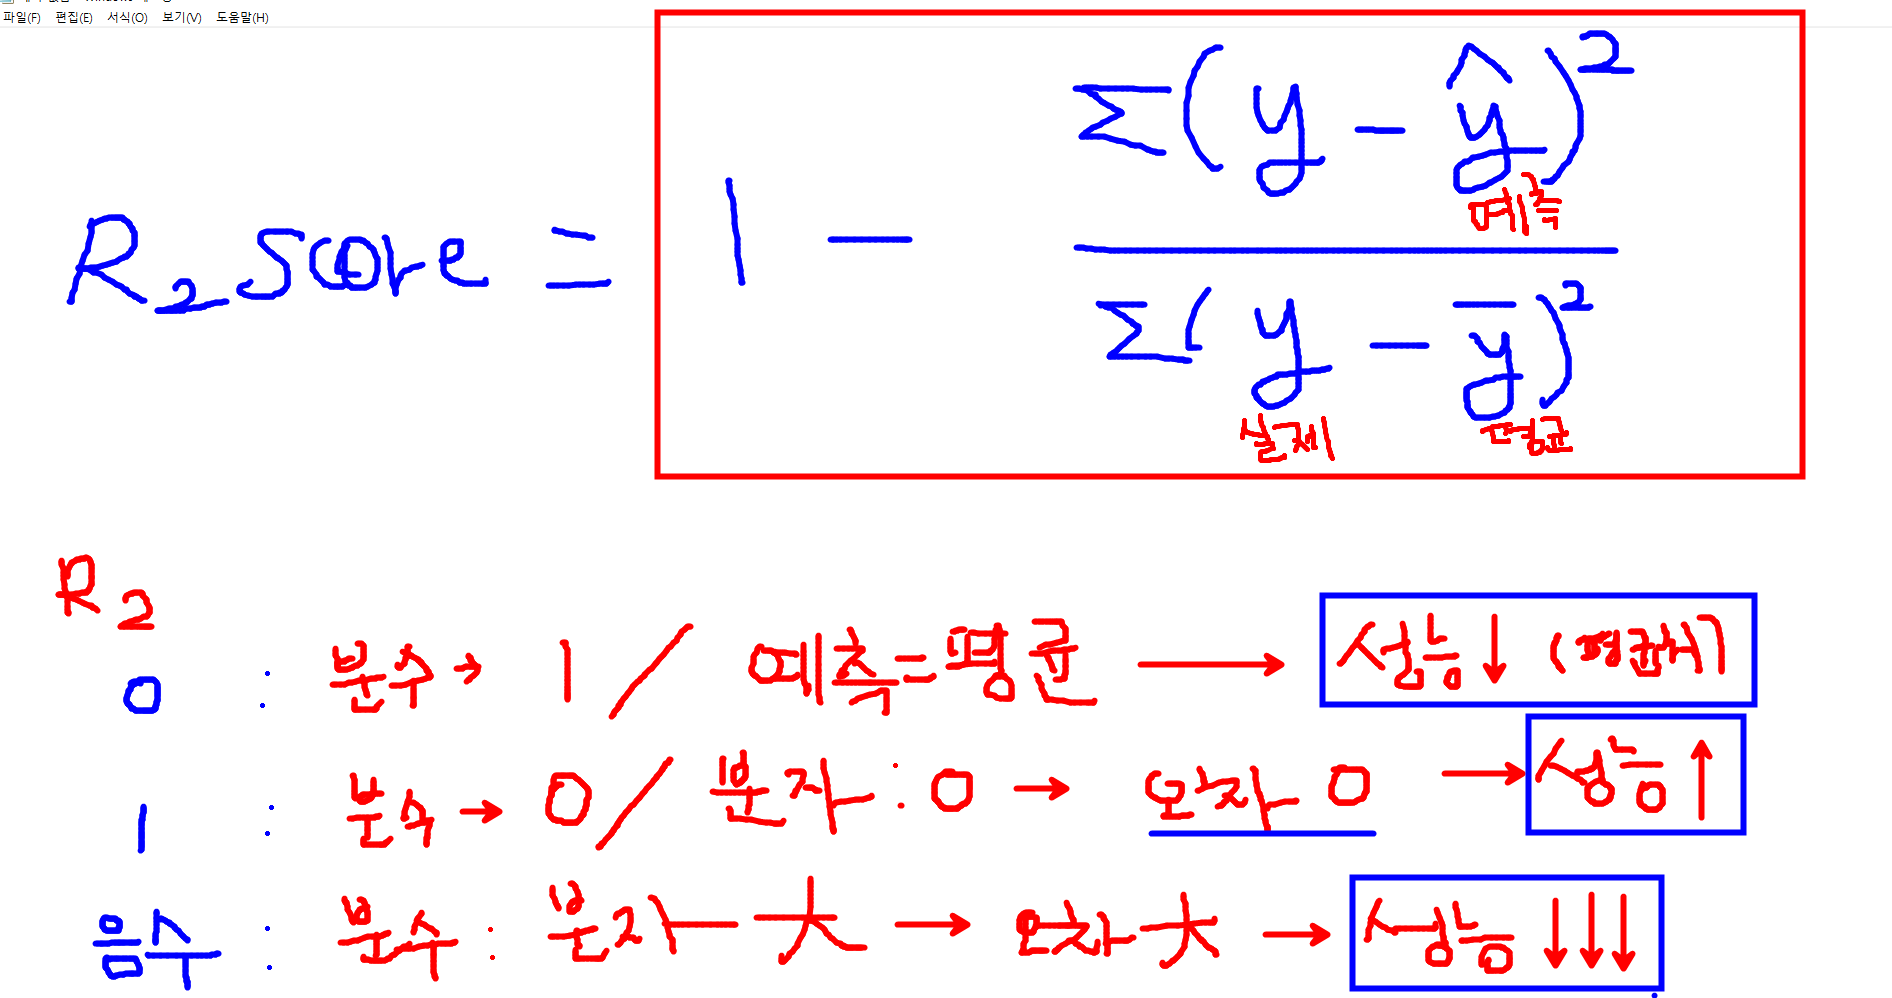
- R₂ score
    - 오차와 평균값을 활용해 정규화된 평가가 가능하게끔 만들어준 평가지표
    - 분산을 활용한 예측 성능평가지표
    - 확률적으로 표현이 됨 : 1에 가까울수록 잘 예측했다고 판단 가능
    - 우리가 score 함수로 쓰는 게 바로 R2 score
    - R₂ Score = 1- ∑(실제값-예측치)^2/∑(실제값-예측치평균값)^2
        - R₂ Score가 1에 가까울수록 실제값과 예측치가 잘 맞아떨어진다는 의미. 모델 성능 좋음.
        - R₂ Score가 0에 가까울수록 예측치가 예측치평균값과 비슷하다는 의미.  모델 성능이 나쁨.
        - R₂ Score가 음수가 나오면 예측치와 실제값의 차이가 크다는 의미. 모델 성능 매우 나쁨!

In [63]:
#MSE 구하기
from sklearn.metrics import mean_squared_error 
#metrics 평가지표 모음집 - #MSE

In [66]:
#(실제값, 예측값) 비교
#(y_test,pre)

lin_pre = lin_model.predict(X_test)
print("MSE 값 : ", mean_squared_error(y_test,lin_pre))
print("RMSE 값 : ", mean_squared_error(y_test,lin_pre)**0.5)
#MSE는 제곱값이기 떄문에 실제 값을 알기 어렵다.
#RMSE로 판단해본 결과 약 47만 달러 차이가 난다.

MSE 값 :  220552447168.5896
RMSE 값 :  469630.11739941634


In [67]:
#SGD 모델의 MSE, RMSE 확인
sgd2_pre = sgd_model2.predict(X_test)
print("MSE 값 : ",mean_squared_error(y_test,sgd2_pre))
print("RMSE 값 : ",mean_squared_error(y_test,sgd2_pre)**0.5)
#SGD모델은 약 53만 달러 차이가 난다.

MSE 값 :  280057559248.77997
RMSE 값 :  529204.6477958976


### 스케일링 적용
- 선형모델 또한 오차라는 거리를 다루는 모델이므로 스케일링을 적용 가능!
- 경사하강법 모델 적용시 학습의 안정성을 위해 스케일링 진행한다.

In [69]:
#StandardScaler 스케일러 생성
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [70]:
#스케일러 학습
scale.fit(X_train)

StandardScaler()

In [72]:
#변환
t_X_train = scale.transform(X_train)
t_X_test = scale.transform(X_test)

In [132]:
#모델학습 및 평가 > R2 score 확인

#LinearRegression
#SGDRegressor

lin_model3 = LinearRegression()
sgd_model3 = SGDRegressor()
lin_model3.fit(t_X_train,y_train)
sgd_model3.fit(t_X_train,y_train)

#score에 따른 평가 
print("Linear 모델 :",lin_model3.score(t_X_test,y_test))
print("SGD 모델 :",sgd_model3.score(t_X_test,y_test))

#평가지표(metrics) : R2 Score
#해석방법 : 1에 가까울수록 성능이 높음
#score가 안정적으로 변한 것을 확인!

Linear 모델 : 0.4581257064433232
SGD 모델 : 0.45786949024383816


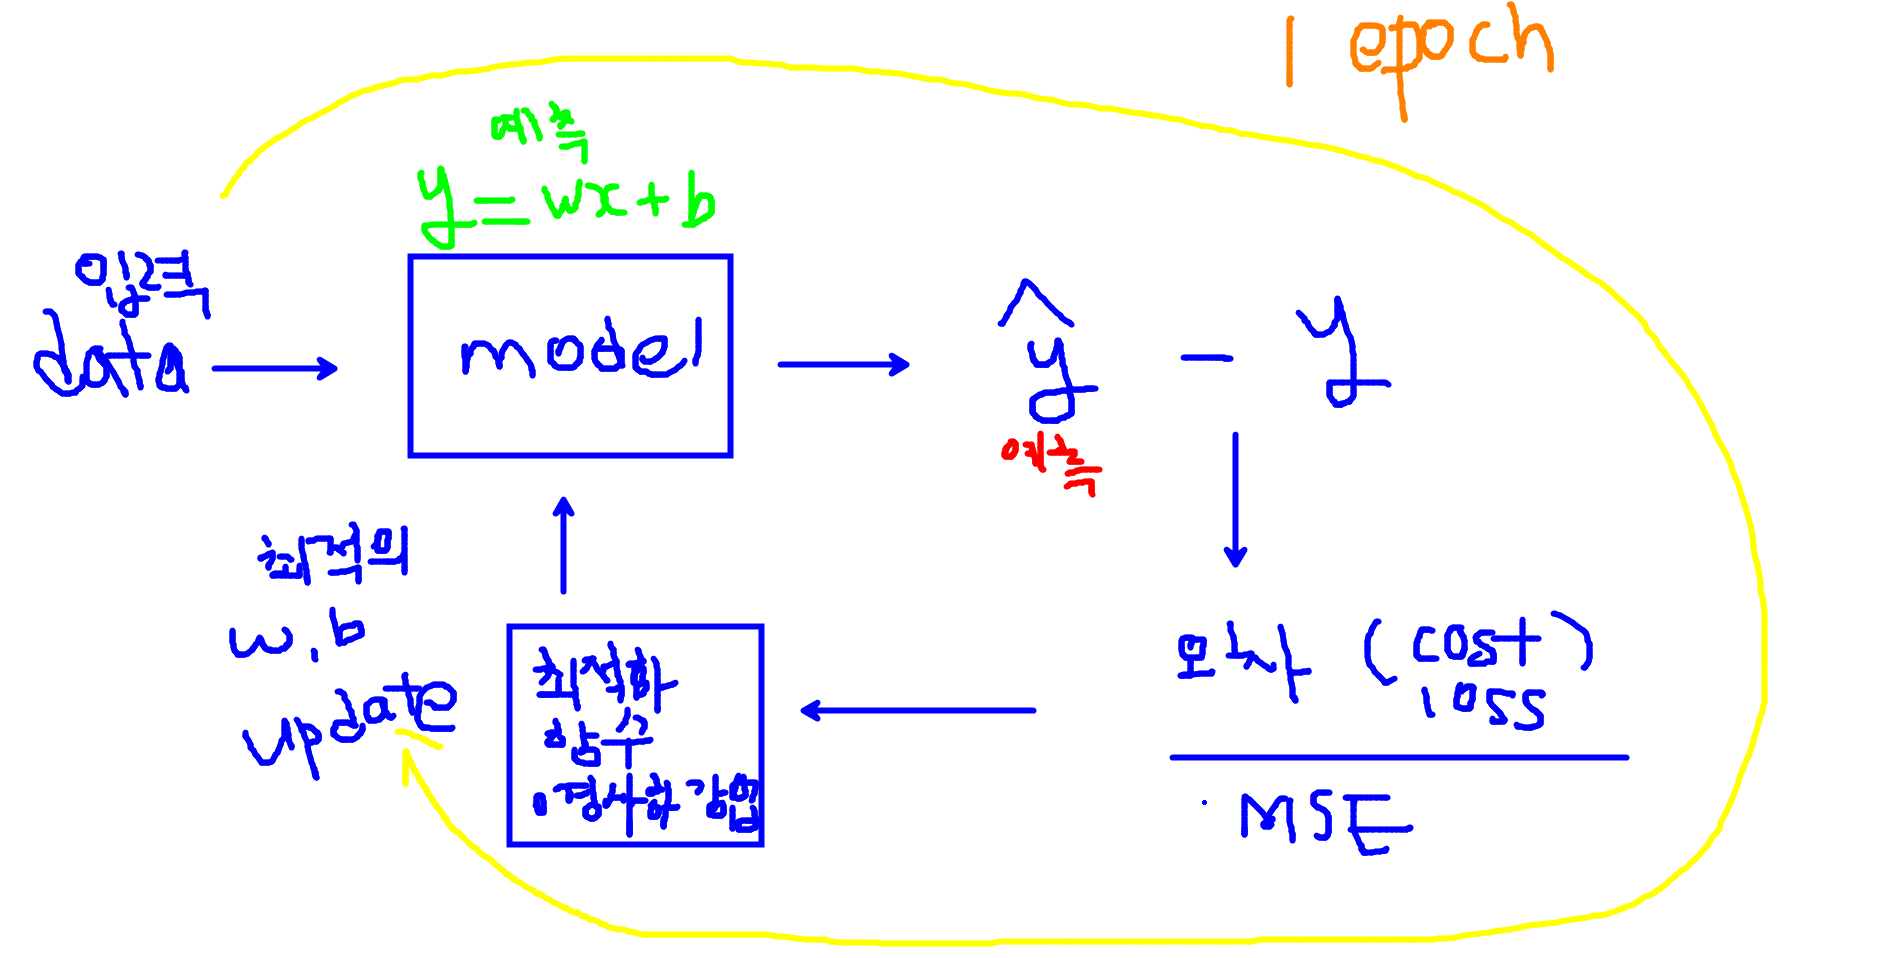

In [135]:
#번외 : RMSE에 따른 평가

lin_pre = lin_model3.predict(t_X_test)
sgd_pre = sgd_model3.predict(t_X_test)


print('Linear 모델 :',mean_squared_error(y_test, lin_pre)**0.5)
print('SGD 모델 :',mean_squared_error(y_test, sgd_pre)**0.5)

Linear 모델 : 469630.11739941605
SGD 모델 : 469741.13265240187
